In [1]:
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

In [2]:
import pandas as pd

#df = pd.read_excel ("C:/Users/sagi A/Downloads/flashspec.xlsx")
#t=(df).to_numpy()

df = pd.read_excel (r"C:\Users\thaim\OneDrive\Desktop\Tal_Projects\Gas_detector\UV\Code\code_files\UV Spectrum\no2.xlsx")
t=(df).to_numpy()


In [3]:
WL=t[0,3:]
flash1=t[1,3:].astype(np.float64)
flash1=flash1-np.min(flash1)
flash1n=flash1
#flash2=t[2,:]
end1=WL.size-1


In [4]:
# Filters- gaussian function
from matplotlib import pyplot as mp
import numpy as np

def gaussian(x, mu, sig):
    #x=x.astype(np.float)
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))

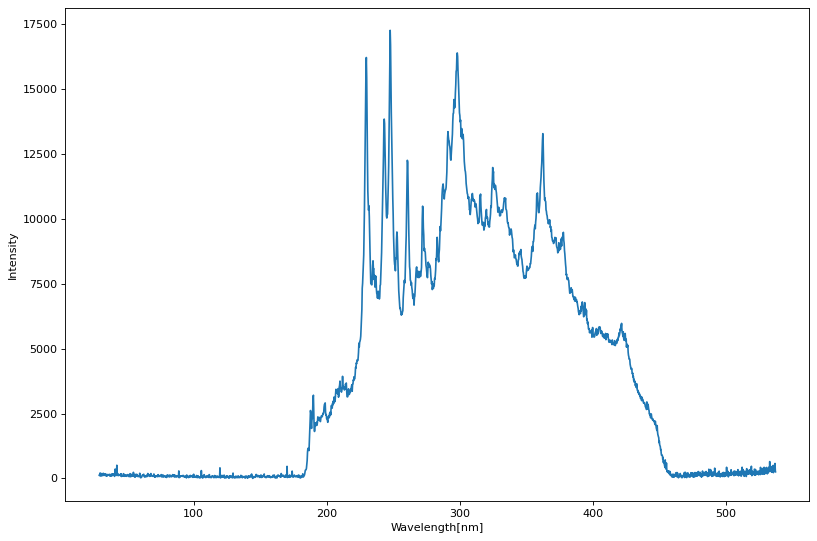

In [5]:

figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')

plt.xlabel("Wavelength[nm]") 
plt.ylabel("Intensity") 
#plt.plot(WL,flash1,label="Excelitas Flash")
plt.plot(WL,flash1,label="Hamamatsu Flash")

#plt.legend(loc="upper right")


plt.show()

In [6]:
# Filters - parameters

filter1c=np.ones(end1+1)
filter2c=np.ones(end1+1)
WL=WL.astype(np.float64)
#WL=WL.float()

GF=np.sqrt(-2*np.log(0.5))
mu_1=220
sig_1=5/GF
PS1=6/18
filter1=PS1*gaussian(WL, mu_1, sig_1)
 
mu_2=254
sig_2=5/GF
PS2=18/18
filter2=PS2*gaussian(WL, mu_2, sig_2)

mu_3=275
sig_3=5/GF
PS3=10/18
filter3=PS3*gaussian(WL, mu_3, sig_3)

mu_4=230
sig_4=10/GF
PS4=6/18
filter4=PS4*gaussian(WL, mu_4, sig_4)


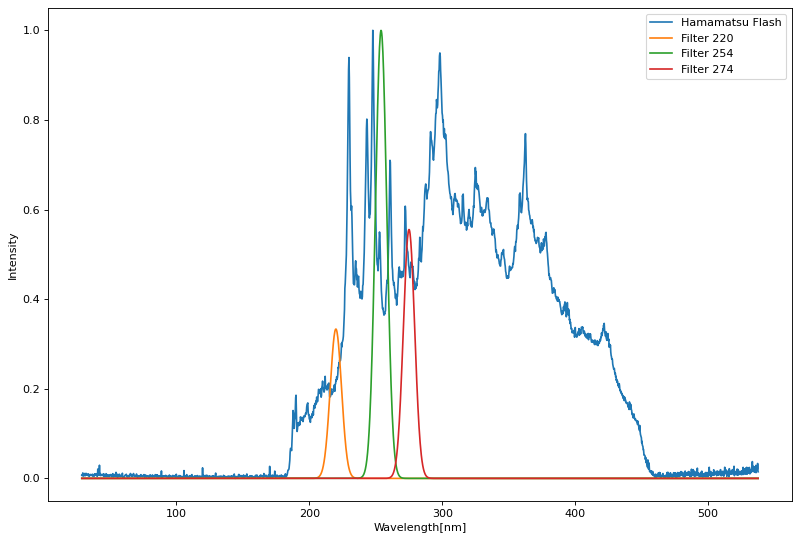

In [7]:
#Flash and Filters

figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')

plt.xlabel("Wavelength[nm]") 
plt.ylabel("Intensity") 
plt.plot(WL,flash1/(np.max(flash1)),label="Hamamatsu Flash")
plt.plot(WL,filter1,label="Filter 220")
plt.plot(WL,filter2,label="Filter 254")
plt.plot(WL,filter3,label="Filter 274")
#plt.plot(WL,filter4,label="Filter 230")

plt.legend(loc="upper right")

plt.show()


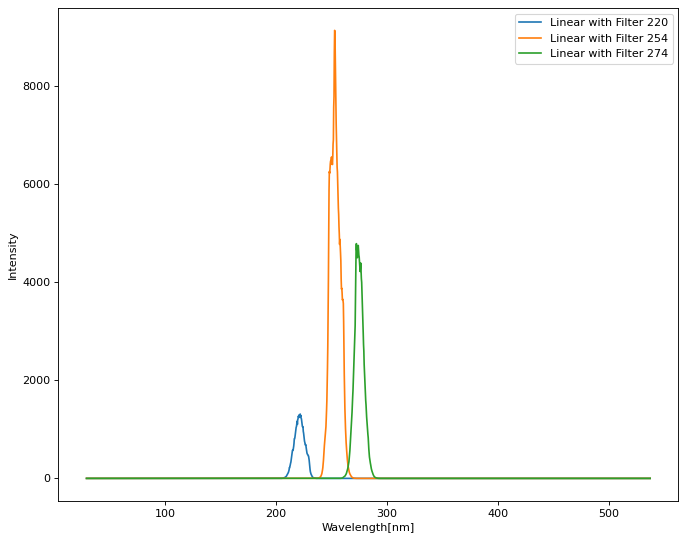

In [8]:
# Filtered linear flash
Linear_filt220=np.multiply(filter1,flash1n)
Linear_filt254=np.multiply(filter2,flash1n)
Linear_filt275=np.multiply(filter3,flash1n)

sig1=sum(Linear_filt220[0:end1])

figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')

plt.xlabel("Wavelength[nm]") 
plt.ylabel("Intensity") 

plt.plot(WL,Linear_filt220,label="Linear with Filter 220")
plt.plot(WL,Linear_filt254,label="Linear with Filter 254")
plt.plot(WL,Linear_filt275,label="Linear with Filter 274")

plt.legend(loc="upper right")

plt.show()


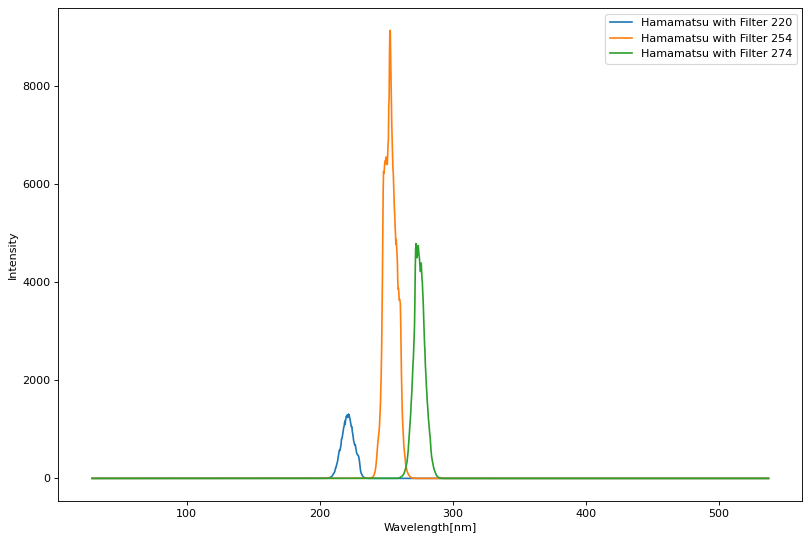

In [9]:
# Filtered Hmamatsu flash
Ham_filt220=np.multiply(filter1,flash1n)
Ham_filt254=np.multiply(filter2,flash1n)
Ham_filt275=np.multiply(filter3,flash1n)
sig2=sum(Ham_filt220[0:end1])
figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')

plt.xlabel("Wavelength[nm]") 
plt.ylabel("Intensity") 

plt.plot(WL,Ham_filt220,label="Hamamatsu with Filter 220")
plt.plot(WL,Ham_filt254,label="Hamamatsu with Filter 254")
plt.plot(WL,Ham_filt275,label="Hamamatsu with Filter 274")

plt.legend(loc="upper right")

plt.show()

# Absorption Spectrums

In [10]:
epsilon=2.504e15  #1/(ppm meter)
CL=1000 #ppm meter

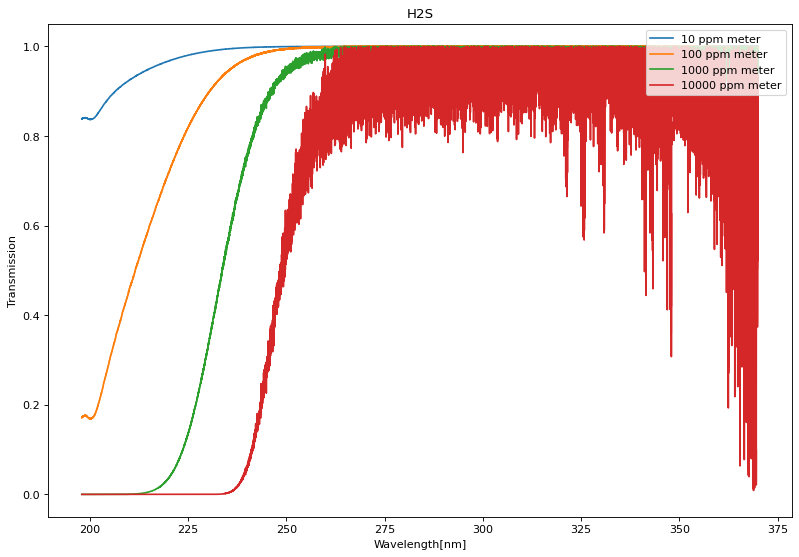

In [11]:
#H2S
H2S = pd.read_excel (r"C:\Users\thaim\OneDrive\Desktop\Tal_Projects\Gas_detector\UV\Code\code_files\UV Spectrum\H2S.xlsx")
H2S_e=(H2S).to_numpy()
WL_H2S=H2S_e[:,0]
H2S_abs=abs(H2S_e[:,1])  # cm^2/mol
list = []
# for i in range(10000):
#     list.append(np.exp(-H2S_abs*epsilon*i)
figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
plt.title("H2S") 
plt.xlabel("Wavelength[nm]") 
plt.ylabel("Transmission") 
#plt.plot(WL2,H2S_abs)
plt.plot(WL_H2S,np.exp(-H2S_abs*epsilon*10),label='10 ppm meter')
plt.plot(WL_H2S,np.exp(-H2S_abs*epsilon*100),label='100 ppm meter')
plt.plot(WL_H2S,np.exp(-H2S_abs*epsilon*1000),label='1000 ppm meter')
plt.plot(WL_H2S,np.exp(-H2S_abs*epsilon*10000),label='10000 ppm meter')
list
plt.legend(loc="upper right")

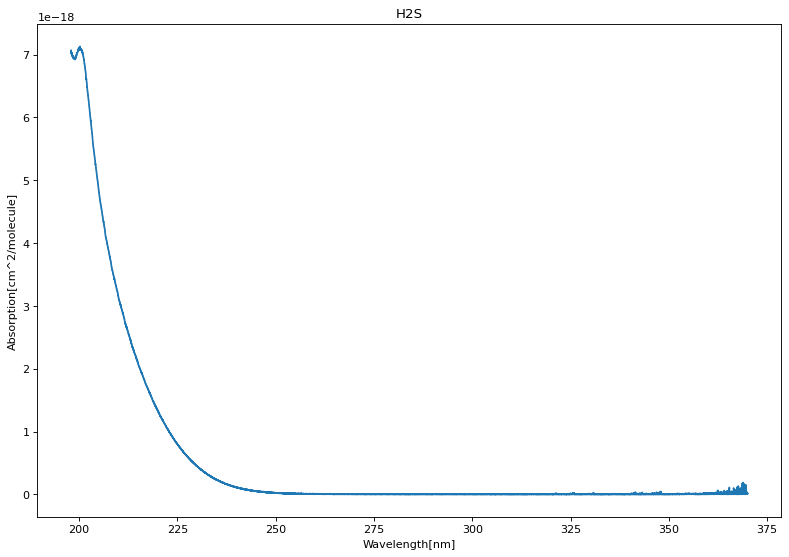

In [12]:
#H2S
H2S = pd.read_excel (r"C:\Users\thaim\OneDrive\Desktop\Tal_Projects\Gas_detector\UV\Code\code_files\UV Spectrum\H2S.xlsx")
H2S_e=(H2S).to_numpy()
H2S_e.shape
WL_H2S=H2S_e[:,0]
H2S_abs=abs(H2S_e[:,1])  # cm^2/mol



figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
plt.title("H2S") 
plt.xlabel("Wavelength[nm]") 
plt.ylabel("Absorption[cm^2/molecule]") 
plt.plot(WL_H2S,H2S_abs)
plt.show()

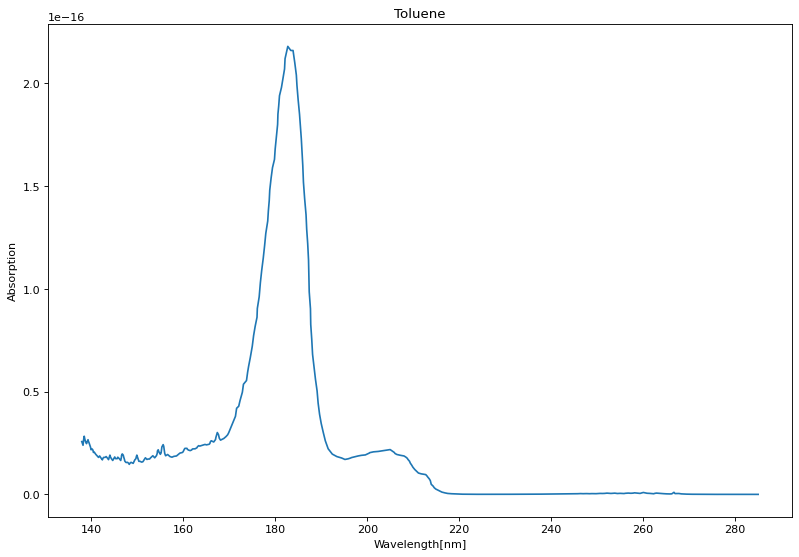

In [13]:

#Toluene
Toluene = pd.read_excel (r"C:\Users\thaim\OneDrive\Desktop\Tal_Projects\Gas_detector\UV\Code\code_files\UV Spectrum\Toluene.xlsx")
Toluene_e=(Toluene).to_numpy()

WL_TOL=Toluene_e[:,0]
Toluene_abs=Toluene_e[:,1]


figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
plt.title("Toluene") 
plt.xlabel("Wavelength[nm]") 
plt.ylabel("Absorption") 
plt.plot(WL_TOL,Toluene_abs)

plt.show()

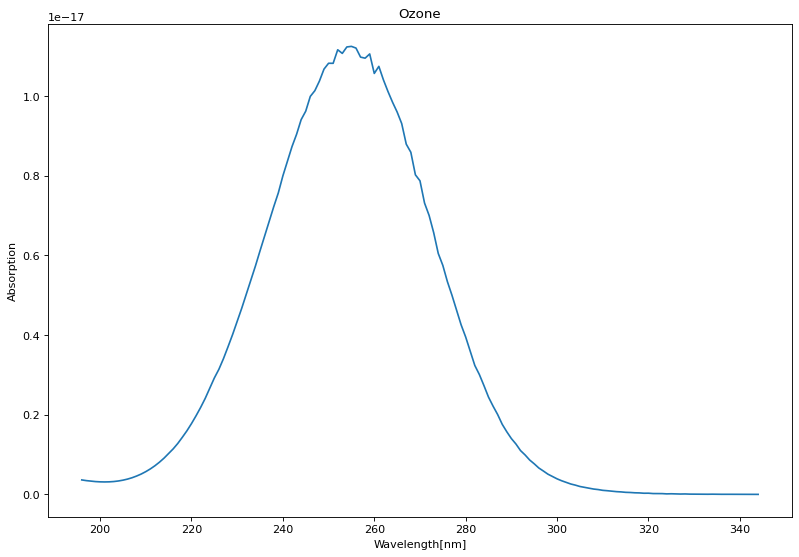

In [14]:
#Ozone
Ozone = pd.read_excel (r"C:\Users\thaim\OneDrive\Desktop\Tal_Projects\Gas_detector\UV\Code\code_files\UV Spectrum\Ozone.xlsx")
Ozone_e=(Ozone).to_numpy()

WL_Oz=Ozone_e[:,0]
Ozone_abs=Ozone_e[:,1]



figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
plt.title("Ozone") 
plt.xlabel("Wavelength[nm]") 
plt.ylabel("Absorption") 
plt.plot(WL_Oz,Ozone_abs)

plt.show()

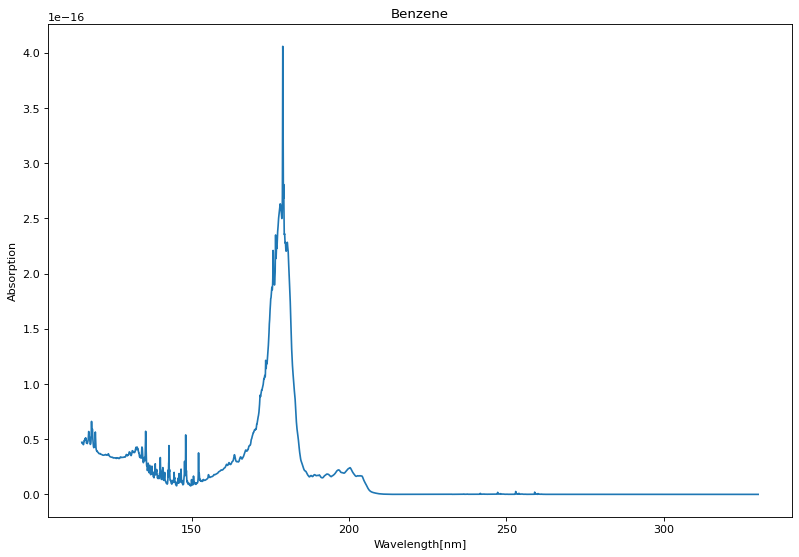

In [15]:
#Benzene
Benzene = pd.read_excel (r"C:\Users\thaim\OneDrive\Desktop\Tal_Projects\Gas_detector\UV\Code\code_files\UV Spectrum\benzene4.xlsx")
Benzene_e=(Benzene).to_numpy()

WL_BEN=Benzene_e[:,0]
Benzene_abs=Benzene_e[:,1]


figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
plt.title("Benzene") 
plt.xlabel("Wavelength[nm]") 
plt.ylabel("Absorption") 
plt.plot(WL_BEN,Benzene_abs)

plt.show()

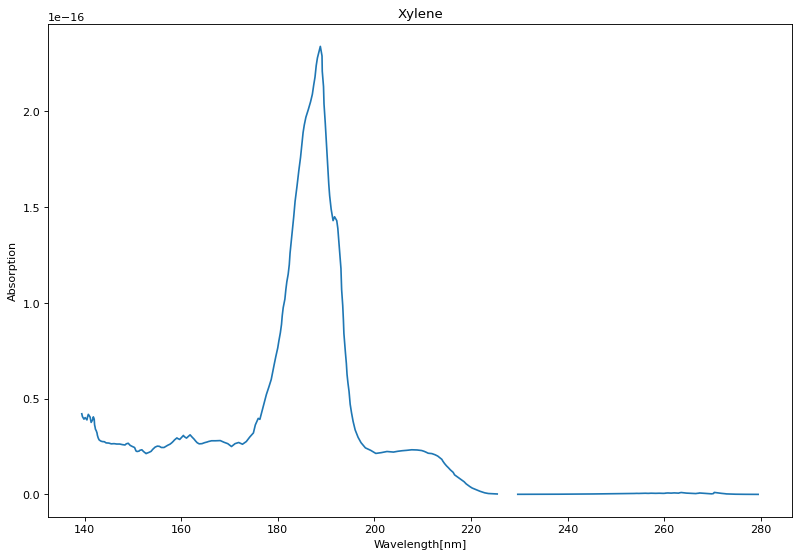

In [16]:
#Xylene
Xylene = pd.read_excel (r"C:\Users\thaim\OneDrive\Desktop\Tal_Projects\Gas_detector\UV\Code\code_files\UV Spectrum\Xylene.xlsx")
Xylene_e=(Xylene).to_numpy()

WL_xy=Xylene_e[:,0]
Xylene_abs=Xylene_e[:,1]


figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
plt.title("Xylene") 
plt.xlabel("Wavelength[nm]") 
plt.ylabel("Absorption") 
plt.plot(WL_xy,Xylene_abs)

plt.show()

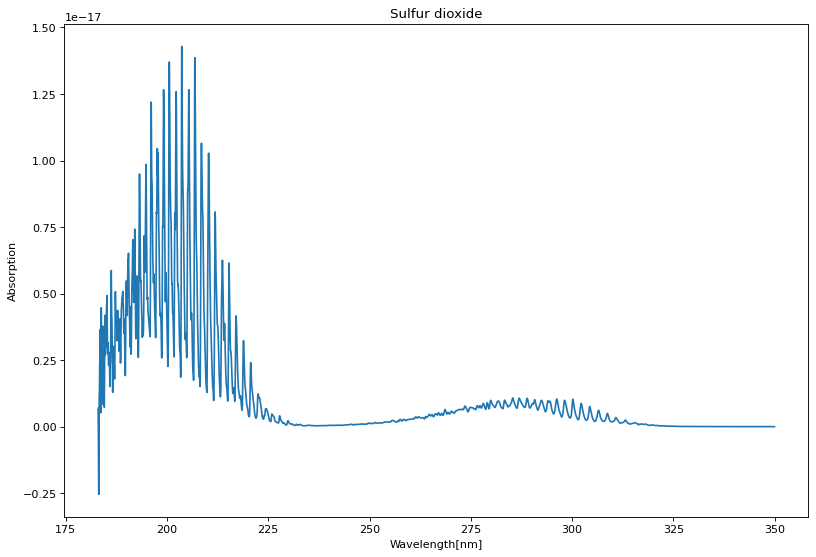

In [17]:
#Sulfur dioxide SO2
SO2 = pd.read_excel (r"C:\Users\thaim\OneDrive\Desktop\Tal_Projects\Gas_detector\UV\Code\code_files\UV Spectrum\SO2.xlsx")
SO2_e=(SO2).to_numpy()

WL_SO2=SO2_e[:,0]
SO2_abs=SO2_e[:,1]


figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
plt.title("Sulfur dioxide") 
plt.xlabel("Wavelength[nm]") 
plt.ylabel("Absorption") 
plt.plot(WL_SO2,SO2_abs)

plt.show()

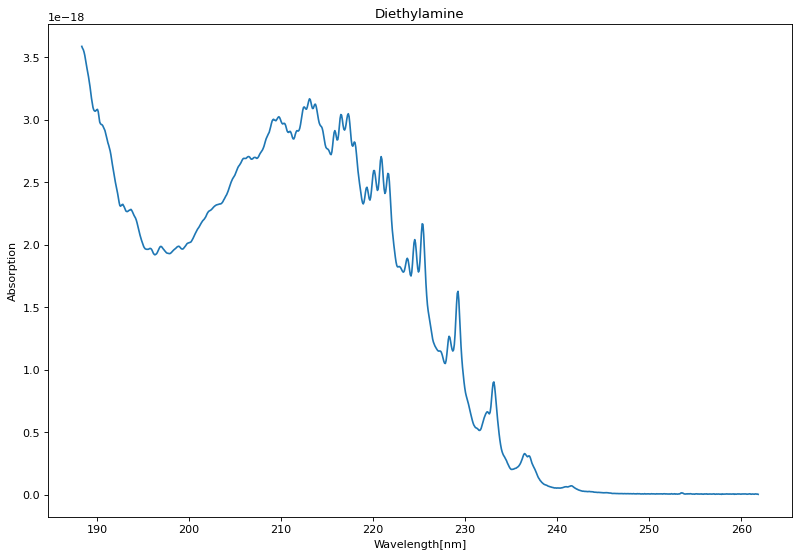

In [18]:
#(C2H5)2NH Diethylamine
C2H52NH = pd.read_excel (r"C:\Users\thaim\OneDrive\Desktop\Tal_Projects\Gas_detector\UV\Code\code_files\UV Spectrum\C2H5NH2.xlsx")
C2H52NH_e=(C2H52NH).to_numpy()

WL_C2H52NH=C2H52NH_e[:,0]
C2H52NH_abs=C2H52NH_e[:,1]


figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
plt.title("Diethylamine") 
plt.xlabel("Wavelength[nm]") 
plt.ylabel("Absorption") 
plt.plot(WL_C2H52NH,C2H52NH_abs)

plt.show()

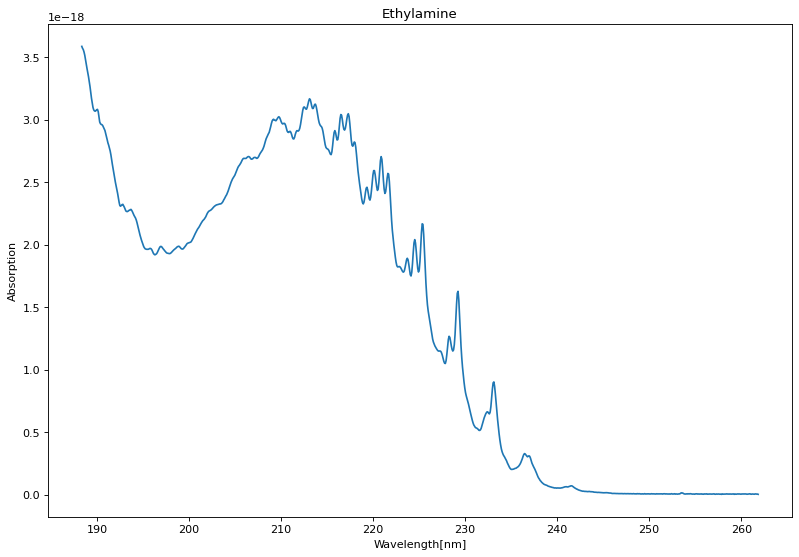

In [19]:
#C2H5NH2 Ethylamine
C2H5NH2 = pd.read_excel (r"C:\Users\thaim\OneDrive\Desktop\Tal_Projects\Gas_detector\UV\Code\code_files\UV Spectrum\C2H5NH2.xlsx")
C2H5NH2_e=(C2H5NH2).to_numpy()

WL_C2H5NH2=C2H5NH2_e[:,0]
C2H5NH2_abs=C2H5NH2_e[:,1]


figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
plt.title("Ethylamine") 
plt.xlabel("Wavelength[nm]") 
plt.ylabel("Absorption") 
plt.plot(WL_C2H5NH2,C2H5NH2_abs)

plt.show()

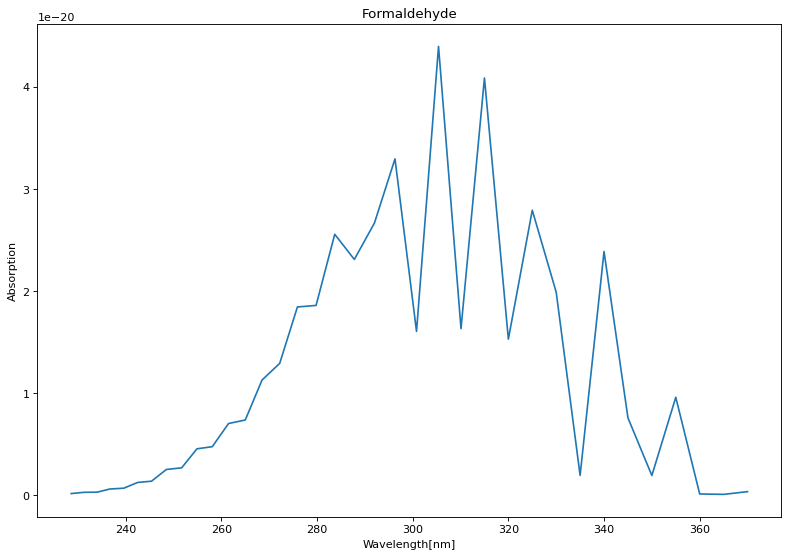

In [20]:
#CH2O Formaldehyde
CH2O = pd.read_excel (r"C:\Users\thaim\OneDrive\Desktop\Tal_Projects\Gas_detector\UV\Code\code_files\UV Spectrum\CH2O.xlsx")
CH2O_e=(CH2O).to_numpy()

WL_CH2O=CH2O_e[:,0]
CH2O_abs=CH2O_e[:,1]


figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
plt.title("Formaldehyde") 
plt.xlabel("Wavelength[nm]") 
plt.ylabel("Absorption") 
plt.plot(WL_CH2O,CH2O_abs)

plt.show()

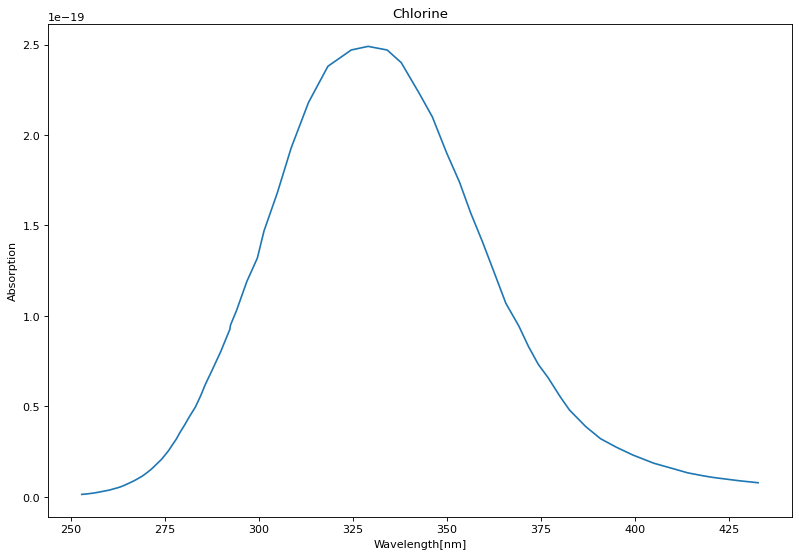

In [21]:
#CI2 Chlorine
CI2 = pd.read_excel (r"C:\Users\thaim\OneDrive\Desktop\Tal_Projects\Gas_detector\UV\Code\code_files\UV Spectrum\CI2.xlsx")
CI2_e=(CI2).to_numpy()

WL_CI2=CI2_e[:,0]
CI2_abs=CI2_e[:,1]


figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
plt.title("Chlorine") 
plt.xlabel("Wavelength[nm]") 
plt.ylabel("Absorption") 
plt.plot(WL_CI2,CI2_abs)

plt.show()

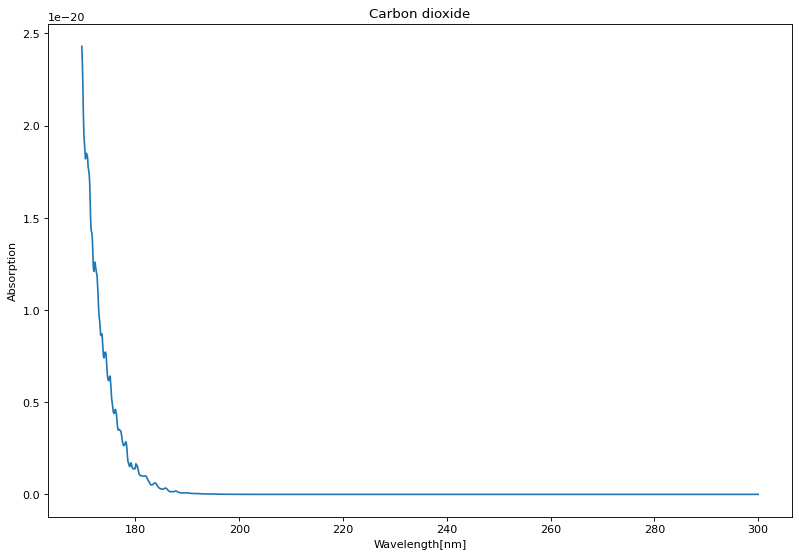

In [22]:
#CO2 Carbon dioxide
CO2 = pd.read_excel (r"C:\Users\thaim\OneDrive\Desktop\Tal_Projects\Gas_detector\UV\Code\code_files\UV Spectrum\CO2.xlsx")
CO2_e=(CO2).to_numpy()

WL_CO2=CO2_e[:,0]
CO2_abs=CO2_e[:,1]


figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
plt.title("Carbon dioxide") 
plt.xlabel("Wavelength[nm]") 
plt.ylabel("Absorption") 
plt.plot(WL_CO2,CO2_abs)

plt.show()

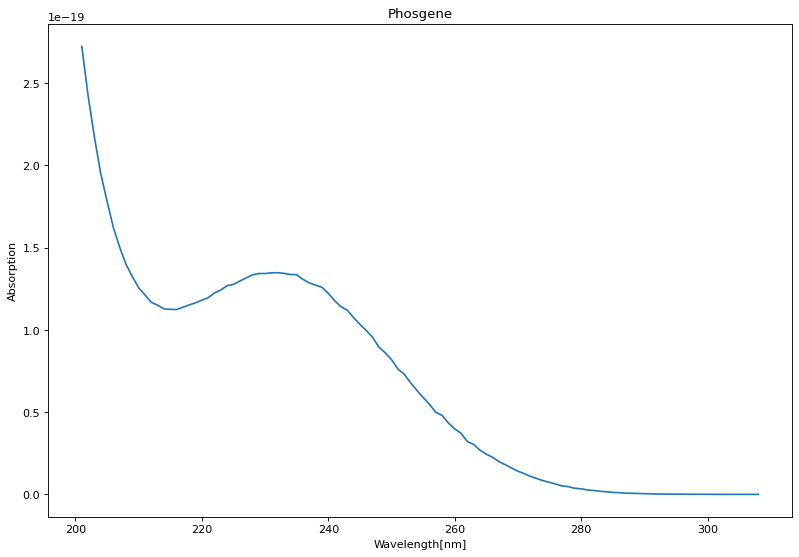

In [23]:
#COCl2 Phosgene
COCl2 = pd.read_excel (r"C:\Users\thaim\OneDrive\Desktop\Tal_Projects\Gas_detector\UV\Code\code_files\UV Spectrum\COCl2.xlsx")
COCl2_e=(COCl2).to_numpy()

WL_COCl2=COCl2_e[:,0]
COCl2_abs=COCl2_e[:,1]


figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
plt.title("Phosgene") 
plt.xlabel("Wavelength[nm]") 
plt.ylabel("Absorption") 
plt.plot(WL_COCl2,COCl2_abs)

plt.show()

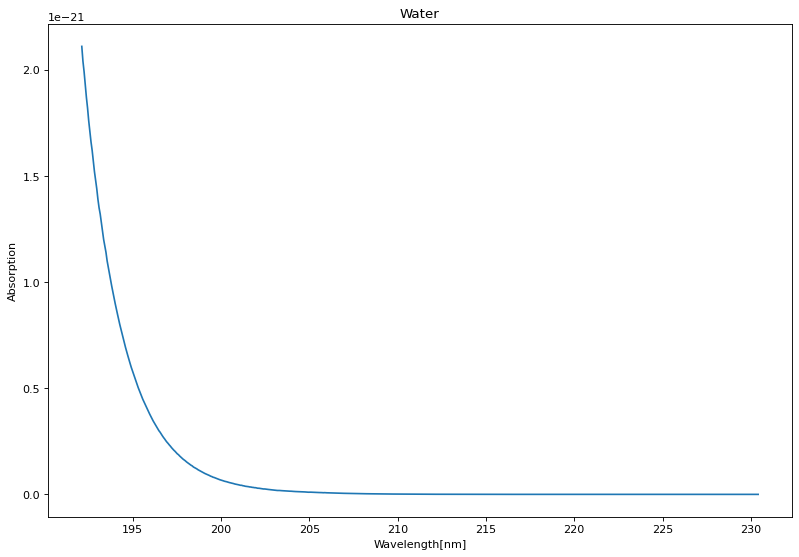

In [24]:
#H2O Water
H2O = pd.read_excel (r"C:\Users\thaim\OneDrive\Desktop\Tal_Projects\Gas_detector\UV\Code\code_files\UV Spectrum\H2O.xlsx")
H2O_e=(H2O).to_numpy()

WL_H2O=H2O_e[:,0]
H2O_abs=H2O_e[:,1]


figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
plt.title("Water") 
plt.xlabel("Wavelength[nm]") 
plt.ylabel("Absorption") 
plt.plot(WL_H2O,H2O_abs)

plt.show()

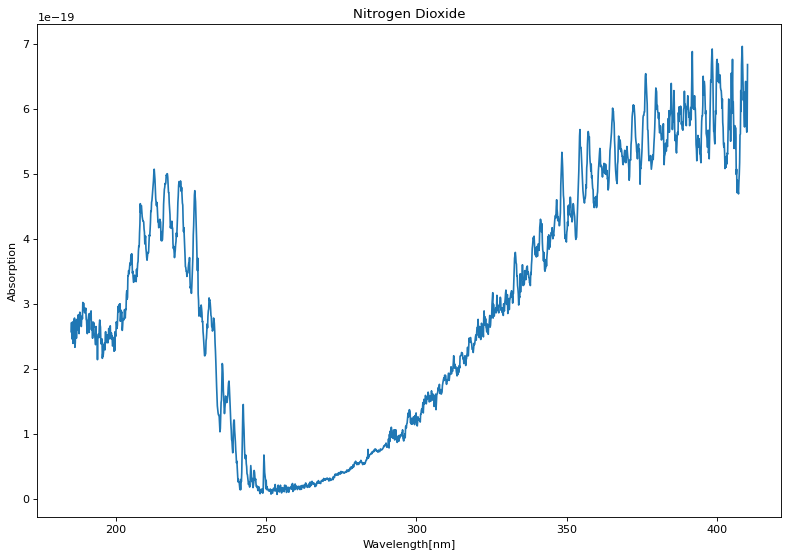

In [25]:
#NO2 Nitrogen Dioxide
NO2 = pd.read_excel (r"C:\Users\thaim\OneDrive\Desktop\Tal_Projects\Gas_detector\UV\Code\code_files\UV Spectrum\NO2_a.xlsx")
NO2_e=(NO2).to_numpy()

WL_NO2=NO2_e[:,0]
NO2_abs=NO2_e[:,1]


figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
plt.title("Nitrogen Dioxide") 
plt.xlabel("Wavelength[nm]") 
plt.ylabel("Absorption") 
plt.plot(WL_NO2,NO2_abs)

plt.show()

In [26]:
## List of Gases

#C2H52NH  Diethylamine

#C2H5NH2 Ethylamine

#CH2O Formaldehyde

#CI2 Chlorine

#CO2 Carbon dioxide

#COCl2 Phosgene

#H2O Water

#NO2 Nitrogen Dioxide


In [27]:
#Insert spectrums

spec2=H2S_abs.astype(np.float64)
spec3=Toluene_abs.astype(np.float64)
spec4=Benzene_abs.astype(np.float64)
spec5=Xylene_abs.astype(np.float64)
spec6=SO2_abs.astype(np.float64)
spec7=Ozone_abs.astype(np.float64)
spec8=CI2_abs.astype(np.float64)
spec9=COCl2_abs.astype(np.float64)
spec10=NO2_abs.astype(np.float64)
spec11=CO2_abs.astype(np.float64)

spec12=C2H52NH_abs.astype(np.float64)
spec13=C2H5NH2_abs.astype(np.float64)
spec14=CH2O_abs.astype(np.float64)


spec15=H2O_abs.astype(np.float64)



# Insert vector wavelength 
#WL=WL.astype(np.float)
WL2=WL_H2S.astype(np.float64)
WL3=WL_TOL.astype(np.float64)
WL4=WL_BEN.astype(np.float64)
WL5=WL_xy.astype(np.float64)
WL6=WL_SO2.astype(np.float64)
WL7=WL_Oz.astype(np.float64)

WL8=WL_CI2.astype(np.float64)
WL9=WL_COCl2.astype(np.float64)
WL10=WL_NO2.astype(np.float64)
WL11=WL_CO2.astype(np.float64)


WL12=WL_C2H52NH.astype(np.float64)
WL13=WL_C2H5NH2.astype(np.float64)
WL14=WL_CH2O.astype(np.float64)

WL15=WL_H2O.astype(np.float64)





# Insert number of spectrums

NOS=6


In [28]:
# Insert Labels and Colors
Labels=["H2S","Toluene","Benzene","Xylene","Sulfur dioxide","Ozone","Phosgene","Nitrogen Dioxide","Carbon dioxide","Diethylamine","Ethylamine","Water","Chlorine"]
colors=['r','g','b','y','m','c','purple',"grey","lime","pink","olive","brown","coral","skyblue"]

In [29]:
# Common wavelength range

range_v=np.zeros((NOS,2))

for i in range(NOS):
    range_v[i,1]=globals()[("WL"+str(i+2))][globals()[("WL"+str(i+2))].size-1]
    range_v[i,0]=globals()[("WL"+str(i+2))][0]

    #range_v[i,1]=globals()[("end"+str(i+2))]

In [30]:
# Finding minimal and maximal wavelenths
min_range=np.max(range_v[:,0])
max_range=np.min(range_v[:,1])


In [41]:
print(max_range)
print(min_range)

279.46
198.009


In [32]:
##  לשנות- לחשב הפרש עבור כל איבר בנפרד ואז לבחור את האינדקס של האיבר בעל ההפרש המינימלי
for i in range(NOS):
    
    vars()["min_wl"+str(i+2)]=0
    vars()["max_wl"+str(i+2)]=int(globals()[("WL"+str(i+2))].size)

    #Thresh=0.5*(globals()[("WL"+str(i+2))][1]-globals()[("WL"+str(i+2))][0])
    Thresh=0.5

    for x in range(globals()[("WL"+str(i+2))].size):
        if abs(globals()[("WL"+str(i+2))][x]-min_range)<=Thresh:
            vars()["min_wl"+str(i+2)]=x
        if abs(globals()[("WL"+str(i+2))][x]-max_range)<=Thresh:
            vars()["max_wl"+str(i+2)]=x
    
    vars()["newWL"+str(i+2)]=globals()[("WL"+str(i+2))][globals()["min_wl"+str(i+2)]:globals()["max_wl"+str(i+2)]]
    vars()["newspec"+str(i+2)]=globals()[("spec"+str(i+2))][globals()["min_wl"+str(i+2)]:globals()["max_wl"+str(i+2)]]

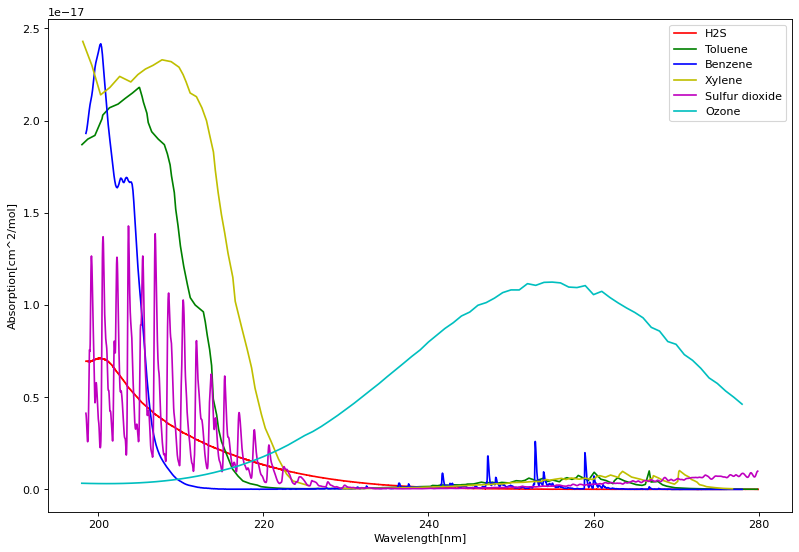

In [33]:
figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')

plt.xlabel("Wavelength[nm]") 
plt.ylabel("Absorption[cm^2/mol]") 
for i in range(NOS):
    plt.plot(globals()["newWL"+str(i+2)], globals()["newspec"+str(i+2)],label=Labels[i],color=colors[i])

plt.legend(loc="upper right")
plt.show()

In [34]:
#Flash Sources
WL1=WL
Thresh1=0.2

for x in range(end1):
    if abs(WL[x]-min_range)<=Thresh1:
        min1=x
    if abs(WL[x]-max_range)<=Thresh1:
        max1=x
N1=max1-min1
newWL1=WL[min1:max1]
newflash1=flash1[min1:max1]
newspec1=flash1[min1:max1]
WL0=WL1
newWL0=newWL1


In [35]:
# Interpolation

NOS2=NOS+1

number_of_elemets=np.zeros(NOS2)

for i in range(NOS2):
    number_of_elemets[i]=globals()[("WL"+str(i+1))].size-1
Max_ax=np.max(number_of_elemets)


for i in range(NOS2):
    if globals()[("WL"+str(i+1))].size-1==Max_ax:
        no_max=str(i+1)
        
UWV=globals()["newWL"+no_max]


for i in range(NOS2):
    vars()["spec_interp"+str(i+1)] = np.interp(globals()["newWL"+no_max],globals()["newWL"+str(i+1)], globals()["newspec"+str(i+1)])

In [36]:
# Normalize
newspec1n=spec_interp1/(np.max(spec_interp1))

In [42]:
# Convert to PPM meter

epsilon=2.504e15  #1/(ppm meter)
CL=500 #ppm meter

for i in range(NOS):
    vars()["newspec"+str(i+2)+'n'] = np.exp(-CL*epsilon*globals()["spec_interp"+str(i+2)])


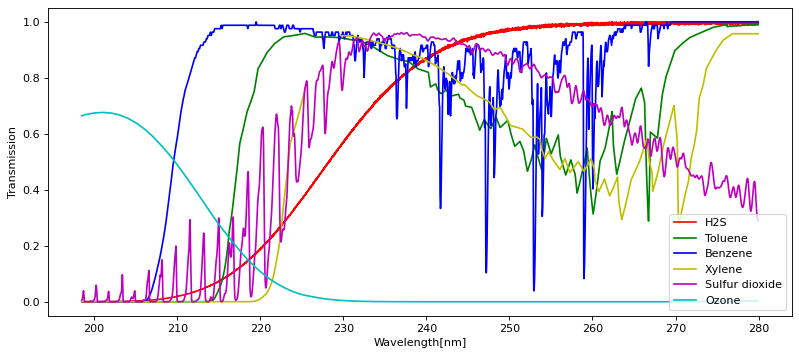

In [43]:
# Plot 
figure(num=None, figsize=(12, 5), dpi=80, facecolor='w', edgecolor='k')

plt.xlabel("Wavelength[nm]") 
plt.ylabel("Transmission") 
#plt.plot(UWV,1-newspec2n,label="H2S")
#plt.plot(UWV,1-newspec3n,label="Toluene")
#plt.plot(UWV,1-newspec4n,label="Ozone")
for i in range(NOS):
    plt.plot(UWV, globals()["newspec"+str(i+2)+'n'],label=Labels[i],color=colors[i])

#plt.plot(UWV,newspec0n,label="Linear Flash")
#plt.plot(UWV,newspec1n,label="Hamamatsu Flash")
plt.legend(loc="lower right")

plt.show()

In [44]:
# Filters - parameters
GF=np.sqrt(-2*np.log(0.5))

mu_1=220
sig_1=10/(2*GF)
PS1=18/18
#PS1=1
filter1=PS1*gaussian(UWV, mu_1, sig_1)
 
mu_2=254
sig_2=10/(2*GF)
PS2=18/18
filter2=PS2*gaussian(UWV, mu_2, sig_2)

mu_3=275
sig_3=10/(2*GF)
PS3=18/18
filter3=PS3*gaussian(UWV, mu_3, sig_3)

mu_4=235
sig_4=10/(2*GF)
PS4=18/18
filter4=PS4*gaussian(UWV, mu_4, sig_4)

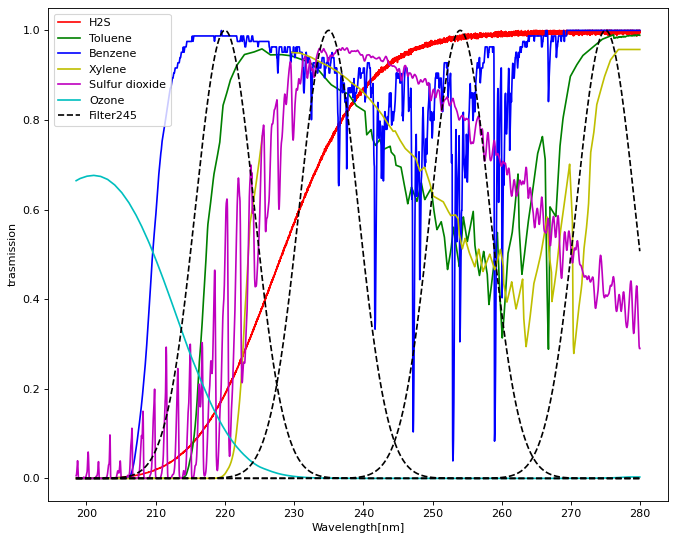

In [45]:
figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')

plt.xlabel("Wavelength[nm]") 
plt.ylabel("trasmission") 

for i in range(NOS):
    plt.plot(UWV, globals()["newspec"+str(i+2)+'n'],label=Labels[i],color=colors[i])

plt.plot(UWV,filter1,'k--')
plt.plot(UWV,filter2,'k--')
plt.plot(UWV,filter3,'k--')
plt.plot(UWV,filter4,'k--',label="Filter245")
plt.legend(loc="upper left")

plt.show()

# Ratios as Function of CL

In [ ]:
###############
#NOS=1
#############

In [ ]:
#CL_vec=np.array([10,100,1000,10000])
CL_vec=np.linspace(0, 1000, 20)
CL_N=CL_vec.size


In [ ]:
CL_vec

In [ ]:
CL_N

In [ ]:
# Convert to PPM meter
epsilon=2.504e15  #1/(ppm meter)
RatioA_Mat=np.zeros((CL_N,NOS))
RatioB_Mat=np.zeros((CL_N,NOS))
RatioC_Mat=np.zeros((CL_N,NOS))
for n in range (CL_N):

    CL=CL_vec[n] #ppm meter

    for i in range(NOS):
        T=np.exp(-CL*epsilon*globals()["spec_interp"+str(i+2)])
        Trasmit_signal=np.multiply(newspec1n,T)
        
        signal=sum(np.multiply(filter1,Trasmit_signal)) 
        refA=sum(np.multiply(filter2,Trasmit_signal)) 
        refB=sum(np.multiply(filter3,Trasmit_signal)) 
        refC=sum(np.multiply(filter4,Trasmit_signal)) 
        RatioA_Mat[n,i]=signal/refA
        RatioB_Mat[n,i]=signal/refB
        RatioC_Mat[n,i]=signal/refC

# No gas (NG)- Hamamatsu
signal_NG=sum(np.multiply(filter1,newspec1n)) 
refA_NG=sum(np.multiply(filter2,newspec1n)) 
refB_NG=sum(np.multiply(filter3,newspec1n)) 
refC_NG=sum(np.multiply(filter4,newspec1n))

RatioA_NG=signal_NG/refA_NG
RatioB_NG=signal_NG/refB_NG
RatioC_NG=signal_NG/refC_NG

In [ ]:
RatioA_Mat= np.log(RatioA_Mat/RatioA_NG)
RatioB_Mat= np.log(RatioB_Mat/RatioB_NG)
RatioC_Mat= np.log(RatioC_Mat/RatioC_NG)

In [ ]:
figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')

plt.xlabel("PPM Meter") 
plt.ylabel("LAN Ratio") 

for i in range(NOS-1):
    plt.plot(CL_vec,RatioA_Mat[:,i],label=Labels[i]+'A',color=colors[i])
    plt.plot(CL_vec,RatioB_Mat[:,i],'--',label=Labels[i]+'B',color=colors[i])
    #plt.plot(CL_vec,RatioC_Mat[:,i],'.',label=Labels[i]+'C',color=colors[i])


plt.legend(loc="lower left")
plt.show()


In [ ]:
figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')

plt.xlabel("PPM Meter") 
plt.ylabel("Ratio diff") 

Ratio_diff_Mat=(RatioA_Mat-RatioB_Mat)

for i in range(NOS-1):
    plt.plot(CL_vec,Ratio_diff_Mat[:,i],colors[i],label=Labels[i]+' diff')

plt.legend(loc="lower left")
plt.show()

In [ ]:
figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')

plt.xlabel("PPM Meter") 
plt.ylabel("Ratio diff") 

Ratio_diff_Mat=(RatioA_Mat-RatioB_Mat)/(RatioA_Mat+RatioB_Mat)

for i in range(NOS):
    plt.plot(CL_vec,Ratio_diff_Mat[:,i],colors[i],label=Labels[i]+' diff')

plt.legend(loc="upper right")
plt.show()

In [ ]:
figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')

plt.xlabel("PPM Meter") 
plt.ylabel("Ratio diff") 

Ratio_diff_Mat2=(RatioA_Mat-RatioC_Mat)/(RatioA_Mat+RatioC_Mat)

for i in range(NOS):
    plt.plot(CL_vec,Ratio_diff_Mat2[:,i],colors[i],label=Labels[i]+' diff')

plt.legend(loc="upper right")
plt.show()

In [ ]:
## Write to Excell file
## convert your array into a dataframe
dfb = pd.DataFrame (RatioA_Mat)

## save to xlsx file

filepath = r"C:\Users\thaim\OneDrive\Desktop\Tal_Projects\Gas_detector\UV\Code\code_files\UV Spectrum\tests"

#dfb.to_excel(filepath, index=False)

# 2-Order Polynomial Fit

In [ ]:
# Ratio A
RatioA_Mat_poly=np.zeros((CL_N,NOS))
RatioA_Mat_poly_coeff=np.zeros((3,NOS))

for i in range(NOS):
    
    z=np.polyfit(CL_vec,RatioA_Mat[:,i],2)
    RatioA_Mat_poly[:,i]=z[0]*(CL_vec)**2+z[1]*(CL_vec)+z[2]
    RatioA_Mat_poly_coeff[:,i]=z

# Plot Poly Fit Ratio A

figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
for i in range(NOS):
    
    plt.plot(CL_vec,RatioA_Mat[:,i],label=Labels[i]+'A',color=colors[i])
    plt.plot(CL_vec,RatioA_Mat_poly[:,i],'--',label=Labels[i]+'A',color=colors[i])


plt.legend(loc="upper left")    
plt.show()



In [ ]:
# Ratio B
RatioB_Mat_poly=np.zeros((CL_N,NOS))
RatioB_Mat_poly_coeff=np.zeros((3,NOS))
for i in range(NOS):
    
    z=np.polyfit(CL_vec,RatioB_Mat[:,i],2)
    RatioB_Mat_poly[:,i]=z[0]*(CL_vec)**2+z[1]*(CL_vec)+z[2]
    RatioB_Mat_poly_coeff[:,i]=z

# Plot Poly Fit Ratio B

figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
for i in range(NOS):
    
    plt.plot(CL_vec,RatioB_Mat[:,i],label=Labels[i]+'B',color=colors[i])
    plt.plot(CL_vec,RatioB_Mat_poly[:,i],'--',label=Labels[i]+'B',color=colors[i])


plt.legend(loc="lower left")    
plt.show()


In [ ]:
# Ratio C
RatioC_Mat_poly=np.zeros((CL_N,NOS))

for i in range(NOS):
    
    z=np.polyfit(CL_vec,RatioC_Mat[:,i],2)
    RatioC_Mat_poly[:,i]=z[0]*(CL_vec)**2+z[1]*(CL_vec)+z[2]

# Plot Poly Fit Ratio C

figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
for i in range(NOS):
    
    plt.plot(CL_vec,RatioC_Mat[:,i],label=Labels[i]+'C',color=colors[i])
    plt.plot(CL_vec,RatioC_Mat_poly[:,i],'--',label=Labels[i]+'C',color=colors[i])


plt.legend(loc="lower left")    
plt.show()


# Linear Fit

In [ ]:
# Ratio A

slope_A=np.zeros(NOS)
cutt_A=np.zeros(NOS)
for i in range(NOS):
    
    z=np.polyfit(CL_vec,RatioA_Mat[:,i],1)
    slope_A[i]=z[0]
    cutt_A[i]=z[1]

    
# Avarage
AvG_A=(0.5*slope_A[1]+0.5*slope_A[2])*CL_vec+(0.5*cutt_A[1]+0.5*cutt_A[2])
# Plot Fit Ratio A

figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
for i in range(NOS-2):
    
    linA=slope_A[i]*CL_vec+cutt_A[i]

    plt.plot(CL_vec,RatioA_Mat[:,i],label=Labels[i]+'A',color=colors[i])
    plt.plot(CL_vec,linA,'--',label=Labels[i]+'A',color=colors[i])

plt.plot(CL_vec,AvG_A,'--',label='Avarage',color='k')

plt.legend(loc="lower left")    
plt.show()



In [ ]:
# Ratio B

slope_B=np.zeros(NOS)
cutt_B=np.zeros(NOS)
for i in range(NOS):
    
    z=np.polyfit(CL_vec,RatioB_Mat[:,i],1)
    slope_B[i]=z[0]
    cutt_B[i]=z[1]
# Avarage
AvG_B=(0.5*slope_B[1]+0.5*slope_B[2])*CL_vec+(0.5*cutt_B[1]+0.5*cutt_B[2])    
# Plot Fit Ratio B

figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
for i in range(NOS-2):
    
    linB=slope_B[i]*CL_vec+cutt_B[i]
    plt.plot(CL_vec,RatioB_Mat[:,i],label=Labels[i]+'B',color=colors[i])
    plt.plot(CL_vec,linB,'--',label=Labels[i]+'B',color=colors[i])
plt.plot(CL_vec,AvG_B,'--',label='Avarage',color='k')
    
plt.legend(loc="lower left")  
plt.show()

In [ ]:
# Ratio C

slope_C=np.zeros(NOS)
cutt_C=np.zeros(NOS)
for i in range(NOS):
    
    z=np.polyfit(CL_vec,RatioC_Mat[:,i],1)
    slope_C[i]=z[0]
    cutt_C[i]=z[1]
# Avarage
AvG_C=0.5*(slope_C[1]+slope_C[2])*CL_vec+0.5*(cutt_C[1]+cutt_C[2])    
# Plot Fit Ratio C

figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
for i in range(NOS-2):
    
    linC=slope_C[i]*CL_vec+cutt_C[i]
    plt.plot(CL_vec,RatioC_Mat[:,i],label=Labels[i]+'C',color=colors[i])
    plt.plot(CL_vec,linC,'--',label=Labels[i]+'C',color=colors[i])
plt.plot(CL_vec,AvG_C,'--',label='Avarage',color='k')
    
plt.legend(loc="lower left")  
plt.show()

Linear Fit in Different Intervals for H2S

In [ ]:
# Ratio A

CL_vec1=CL_vec[0:6].astype(np.float64)
CL_vec2=CL_vec[6:14].astype(np.float64)
CL_vec3=CL_vec[14:20].astype(np.float64)

RatioA_Mat1=RatioA_Mat[0:6,0].astype(np.float64)
RatioA_Mat2=RatioA_Mat[6:14,0].astype(np.float64)
RatioA_Mat3=RatioA_Mat[14:20,0].astype(np.float64)


slope_A_d=np.zeros(3)
cutt_A_d=np.zeros(3)

# Segment 1    
z=np.polyfit(CL_vec1,RatioA_Mat1,1)
slope_A_d[0]=z[0]
cutt_A_d[0]=z[1]
Seg1_A=slope_A_d[0]*CL_vec1+cutt_A_d[0]

# Segment 2    
z=np.polyfit(CL_vec2,RatioA_Mat2,1)
slope_A_d[1]=z[0]
cutt_A_d[1]=z[1]
Seg2_A=slope_A_d[1]*CL_vec2+cutt_A_d[1]

# Segment 3    
z=np.polyfit(CL_vec3,RatioA_Mat3,1)
slope_A_d[2]=z[0]
cutt_A_d[2]=z[1]
Seg3_A=slope_A_d[2]*CL_vec3+cutt_A_d[2]

merge_fit_A=np.concatenate((Seg1_A,Seg2_A,Seg3_A),axis=None)

figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.plot(CL_vec,RatioA_Mat[:,0],label='Real',color='r')
plt.plot(CL_vec,merge_fit_A,'--',label='Segment Linear',color='r')
#plt.plot(CL_vec,slope_A[0]*CL_vec+cutt_A[0],'--',label='Linear',color='r')
plt.legend(loc="lower left")  
plt.show()



In [ ]:
# Ratio B

CL_vec1=CL_vec[0:6].astype(np.float64)
CL_vec2=CL_vec[6:14].astype(np.float64)
CL_vec3=CL_vec[14:20].astype(np.float64)

RatioB_Mat1=RatioA_Mat[0:6,0].astype(np.float64)
RatioB_Mat2=RatioA_Mat[6:14,0].astype(np.float64)
RatioB_Mat3=RatioA_Mat[14:20,0].astype(np.float64)


slope_B_d=np.zeros(3)
cutt_B_d=np.zeros(3)

# Segment 1    
z=np.polyfit(CL_vec1,RatioB_Mat1,1)
slope_B_d[0]=z[0]
cutt_B_d[0]=z[1]
Seg1_B=slope_B_d[0]*CL_vec1+cutt_B_d[0]

# Segment 2    
z=np.polyfit(CL_vec2,RatioB_Mat2,1)
slope_B_d[1]=z[0]
cutt_B_d[1]=z[1]
Seg2_B=slope_B_d[1]*CL_vec2+cutt_B_d[1]

# Segment 3    
z=np.polyfit(CL_vec3,RatioB_Mat3,1)
slope_B_d[2]=z[0]
cutt_B_d[2]=z[1]
Seg3_B=slope_B_d[2]*CL_vec3+cutt_B_d[2]

merge_fit_B=np.concatenate((Seg1_B,Seg2_B,Seg3_B),axis=None)

figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.plot(CL_vec,RatioB_Mat[:,0],label='Real',color='b')
plt.plot(CL_vec,merge_fit_B,'--',label='Segment Linear',color='k')
plt.plot(CL_vec,slope_B[0]*CL_vec+cutt_B[0],'--',label='Linear',color='r')



# Combination of Different Gases

In [ ]:
#CL_vec=np.array([10,100,1000,10000])
CL_vec=np.linspace(0, 1000, 20)
CL_N=CL_vec.size
epsilon=2.504e15  #1/(ppm meter)

Signal_Mat=np.zeros((CL_N,CL_N))
Refer_A_Mat=np.zeros((CL_N,CL_N))
Refer_B_Mat=np.zeros((CL_N,CL_N))
Refer_C_Mat=np.zeros((CL_N,CL_N))


Rat_A_Mat=np.zeros((CL_N,CL_N))
Rat_B_Mat=np.zeros((CL_N,CL_N))
Rat_C_Mat=np.zeros((CL_N,CL_N))

Rat_A_Mat_E=np.zeros((CL_N,CL_N))
Rat_B_Mat_E=np.zeros((CL_N,CL_N))
Rat_C_Mat_E=np.zeros((CL_N,CL_N))

Rat_A_Mat_P=np.zeros((CL_N,CL_N))
Rat_B_Mat_P=np.zeros((CL_N,CL_N))

for n in range (CL_N):
    for m in range (CL_N):
        for k in range (CL_N):
            

                CL2=CL_vec[n] #ppm meter
                CL3=CL_vec[m] #ppm meter
                CL4=0#CL_vec[k] #ppm meter
                
                T=np.exp(-CL2*epsilon*spec_interp2-CL3*epsilon*spec_interp3-CL4*epsilon*spec_interp4)
                #T=np.exp(-CL2*epsilon*spec_interp2-CL3*epsilon*spec_interp3)
                Trasmit_signal=np.multiply(newspec1n,T)
        
                signal=sum(np.multiply(filter1,Trasmit_signal)) 
                refA=sum(np.multiply(filter2,Trasmit_signal)) 
                refB=sum(np.multiply(filter3,Trasmit_signal)) 
                refC=sum(np.multiply(filter4,Trasmit_signal)) 
                
                Signal_Mat[n,m]=signal
                Refer_A_Mat[n,m]=refA
                Refer_B_Mat[n,m]=refB
                Refer_C_Mat[n,m]=refC
                
                
                Rat_A_Mat[n,m]=signal/refA
                Rat_B_Mat[n,m]=signal/refB
                Rat_C_Mat[n,m]=signal/refC
                
                Rat_A_Mat_E[n,m]=slope_A[0]*CL2+slope_A[1]*CL3+slope_A[2]*CL4+cutt_A[0]+cutt_A[1]+cutt_A[2]
                Rat_B_Mat_E[n,m]=slope_B[0]*CL2+slope_B[1]*CL3+slope_B[2]*CL4+cutt_B[0]+cutt_B[1]+cutt_B[2]
                
                a=RatioA_Mat_poly_coeff[0,0]
                b=RatioA_Mat_poly_coeff[1,0]
                c=RatioA_Mat_poly_coeff[2,0]                
                Rat_A_Mat_P[n,m]=a*CL2**2+b*CL2+c#+RatioA_Mat_poly_coeff[0,1]*CL3**2+RatioA_Mat_poly_coeff[1,1]*CL3+RatioA_Mat_poly_coeff[2,1]
                
                a=RatioB_Mat_poly_coeff[0,0]
                b=RatioB_Mat_poly_coeff[1,0]
                c=RatioB_Mat_poly_coeff[2,0]                
                Rat_B_Mat_P[n,m]=a*CL2**2+b*CL2+c#+RatioB_Mat_poly_coeff[0,1]*CL3**2+RatioB_Mat_poly_coeff[1,1]*CL3+RatioB_Mat_poly_coeff[2,1]
                

                
                                
                
# No gas (NG)
T=np.exp(0)
Trasmit_signal=np.multiply(newspec1n,T)
signal_NG=sum(np.multiply(filter1,Trasmit_signal)) 
refA_NG=sum(np.multiply(filter2,Trasmit_signal)) 
refB_NG=sum(np.multiply(filter3,Trasmit_signal)) 
refC_NG=sum(np.multiply(filter4,Trasmit_signal)) 

RatioA_NG=signal_NG/refA_NG
RatioB_NG=signal_NG/refB_NG
RatioC_NG=signal_NG/refC_NG

Rat_A_Mat=np.log(Rat_A_Mat/RatioA_NG)
Rat_B_Mat=np.log(Rat_B_Mat/RatioB_NG)
Rat_C_Mat=np.log(Rat_C_Mat/RatioB_NG)

A=(Rat_A_Mat).reshape(CL_N*CL_N)
B=(Rat_B_Mat).reshape(CL_N*CL_N)
C=(Rat_C_Mat).reshape(CL_N*CL_N)

A_E=(Rat_A_Mat_E).reshape(CL_N*CL_N)
B_E=(Rat_B_Mat_E).reshape(CL_N*CL_N)

A_P=(Rat_A_Mat_P).reshape(CL_N*CL_N)
B_P=(Rat_B_Mat_P).reshape(CL_N*CL_N)

#A=np.concatenate(Rat_A_Mat,axis=None)
#B=np.concatenate(Rat_B_Mat,axis=None)
#C=np.concatenate(Rat_C_Mat,axis=None)

In [ ]:
figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.plot(A,'b')
plt.plot(A_E,'r')
plt.plot(A_P,'g')


In [ ]:
figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')

plt.plot(abs(A-A_E),'r')
plt.plot(abs(A-A_P),'g')

In [ ]:
figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.plot(B,'b')
plt.plot(B_E,'r')
plt.plot(B_P,'g')


In [ ]:
figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')

plt.plot(abs(B-(B_E+0.0)),'r')
plt.plot(abs(B-B_P),'g')

# Reconstruction By Slopes

In [ ]:
from numpy.linalg import inv

In [ ]:
# Transfer Matrix- Benzene+ Toluene

BF=0.5
TF=1-BF
trans_mat=np.array([[slope_A[0],(TF*slope_A[1]+BF*slope_A[2])],[slope_B[0],(TF*slope_B[1]+BF*slope_B[2])]])
inv_mat=inv(trans_mat)


# Dynamic Transfer Matrix
trans_mat_s1=np.array([[slope_A_d[0],(0.5*slope_A[1]+0.5*slope_A[2])],[slope_B_d[0],(0.5*slope_B[1]+0.5*slope_B[2])]])
inv_mat_s1=inv(trans_mat_s1)

trans_mat_s2=np.array([[slope_A_d[1],(0.5*slope_A[1]+0.5*slope_A[2])],[slope_B_d[1],(0.5*slope_B[1]+0.5*slope_B[2])]])
inv_mat_s2=inv(trans_mat_s2)

trans_mat_s3=np.array([[slope_A_d[2],(0.5*slope_A[1]+0.5*slope_A[2])],[slope_B_d[2],(0.5*slope_B[1]+0.5*slope_B[2])]])
inv_mat_s3=inv(trans_mat_s3)

# Transfer Vector
trans_vec=np.array([cutt_A[0]+(TF*cutt_A[1]+BF*cutt_A[2]),cutt_B[0]+(TF*cutt_B[1]+BF*cutt_B[2])])

#trans_vec=np.array([cutt_A[0]+(0.5*cutt_A[1]+0.5*cutt_A[2]),0])

# Dynamic Trasfer Vector
trans_vec_s1=np.array([cutt_A_d[0]+(0.5*cutt_A[1]+0.5*cutt_A[2]),cutt_B_d[0]+(0.5*cutt_B[1]+0.5*cutt_B[2])])
trans_vec_s2=np.array([cutt_A_d[1]+(0.5*cutt_A[1]+0.5*cutt_A[2]),cutt_B_d[1]+(0.5*cutt_B[1]+0.5*cutt_B[2])])
trans_vec_s3=np.array([cutt_A_d[2]+(0.5*cutt_A[1]+0.5*cutt_A[2]),cutt_B_d[2]+(0.5*cutt_B[1]+0.5*cutt_B[2])])



In [ ]:
## Transfer Matrix-Toluene
#trans_mat=np.array([[slope_A[0],slope_A[1]],[slope_B[0],slope_B[1]]])
#inv_mat=inv(trans_mat)


## Dynamic Transfer Matrix
#trans_mat_s1=np.array([[slope_A_d[0],slope_A[1]],[slope_B_d[0],slope_B[1]]])
#inv_mat_s1=inv(trans_mat_s1)

#trans_mat_s2=np.array([[slope_A_d[1],slope_A[1]],[slope_B_d[1],slope_B[1]]])
#inv_mat_s2=inv(trans_mat_s2)

#trans_mat_s3=np.array([[slope_A_d[2],slope_A[1]],[slope_B_d[2],slope_B[1]]])
#inv_mat_s3=inv(trans_mat_s3)

## Transfer Vector
#trans_vec=np.array([cutt_A[0]+cutt_A[1],cutt_B[0]+cutt_B[1]])

## Dynamic Trasfer Vector
#trans_vec_s1=np.array([cutt_A_d[0]+cutt_A[1],cutt_B_d[0]+cutt_B[1]])
#trans_vec_s2=np.array([cutt_A_d[1]+cutt_A[1],cutt_B_d[1]+cutt_B[1]])
#trans_vec_s3=np.array([cutt_A_d[2]+cutt_A[1],cutt_B_d[2]+cutt_B[1]])

In [ ]:

CL2=CL_vec[19] #ppm meter
CL3=CL_vec[0] #ppm meter
CL4=CL_vec[19] #ppm meter

real_con=np.array([CL2,0.5*(CL3+CL4)])
                
T=np.exp(-CL2*epsilon*spec_interp2-CL3*epsilon*spec_interp3-CL4*epsilon*spec_interp4)
Trasmit_signal=np.multiply(newspec1n,T)
        
signal=sum(np.multiply(filter1,Trasmit_signal)) 
refA=sum(np.multiply(filter2,Trasmit_signal)) 
refB=sum(np.multiply(filter3,Trasmit_signal)) 

Rat_A=signal/refA
Rat_B=signal/refB
                
                
# No gas (NG)
signal_NG=sum(np.multiply(filter1,newspec1n)) 
refA_NG=sum(np.multiply(filter2,newspec1n)) 
refB_NG=sum(np.multiply(filter3,newspec1n)) 

RatioA_NG=signal_NG/refA_NG
RatioB_NG=signal_NG/refB_NG

Rat_A=np.log(Rat_A/RatioA_NG)
Rat_B=np.log(Rat_B/RatioB_NG)

Measured_Vec=np.array([Rat_A,Rat_B])
VECT=Measured_Vec-trans_vec
rec_vec=np.dot(inv_mat,VECT)

Tot_Err=abs(rec_vec[0]-real_con[0])
Rel_Err=abs(rec_vec[0]-real_con[0])/(real_con[0])*100

print('Real Value:',real_con[0])
print('Estimated Value:',rec_vec[0])

print('Total Error:',Tot_Err)
print('Relative Error:',Rel_Err)

Reconstruction with the whole gas combinations

In [ ]:
NOSb=3
#CL_vec=np.array([10,100,1000,10000])
CL_vec=np.linspace(0, 1000, 20)
CL_N=CL_vec.size
epsilon=2.504e15  #1/(ppm meter)
Signal_Mat=np.zeros((CL_N,CL_N,CL_N))
Refer_A_Mat=np.zeros((CL_N,CL_N,CL_N))
Refer_B_Mat=np.zeros((CL_N,CL_N,CL_N))
Rat_A_Mat=np.zeros((CL_N,CL_N,CL_N))
Rat_B_Mat=np.zeros((CL_N,CL_N,CL_N))

#H2S Concentration 
i=0
H2S_CON=np.zeros((CL_N**NOSb))
BAD_ES=np.zeros((CL_N**NOSb))
Estimated_H2S=np.zeros((CL_N**NOSb))
Estimated_H2S_2=np.zeros((CL_N**NOSb))

Poly2A_ES_C=np.zeros((CL_N**NOSb))
Poly2B_ES_C=np.zeros((CL_N**NOSb))


# No gas (NG)
signal_NG=sum(np.multiply(filter1,newspec1n)) 
refA_NG=sum(np.multiply(filter2,newspec1n)) 
refB_NG=sum(np.multiply(filter3,newspec1n)) 

RatioA_NG=signal_NG/refA_NG
RatioB_NG=signal_NG/refB_NG

# Errors

Tot_Err_vec=np.zeros((CL_N**NOSb))
Rel_Err_vec=np.zeros((CL_N**NOSb))

for n in range (CL_N):
    for m in range (CL_N):
        for k in range (CL_N):
            

                CL2=CL_vec[n] #ppm meter
                CL3=CL_vec[m] #ppm meter
                CL4=CL_vec[k] #ppm meter
                
                
                
                T=np.exp(-CL2*epsilon*spec_interp2-CL3*epsilon*spec_interp3-CL4*epsilon*spec_interp4)
                Trasmit_signal=np.multiply(newspec1n,T)
        
                signal=sum(np.multiply(filter1,Trasmit_signal)) 
                refA=sum(np.multiply(filter2,Trasmit_signal)) 
                refB=sum(np.multiply(filter3,Trasmit_signal)) 
                
                Signal_Mat[n,m,k]=signal
                Refer_A_Mat[n,m,k]=refA
                Refer_B_Mat[n,m,k]=refB
                Rat_A_Mat[n,m,k]=signal/refA
                Rat_B_Mat[n,m,k]=signal/refB
                
                Rat_A_Mat[n,m,k]=np.log(Rat_A_Mat[n,m,k]/RatioA_NG)
                Rat_B_Mat[n,m,k]=np.log(Rat_B_Mat[n,m,k]/RatioB_NG)
      
                
                Measured_Vec=np.array([Rat_A_Mat[n,m,k],Rat_B_Mat[n,m,k]])
                
                inv_mat_m=inv_mat_s1
                trans_vec_m=trans_vec_s1
                
                inv_mat_m=inv_mat
                trans_vec_m=trans_vec
            
            
                
                #if (CL2<687) and (CL2>263):
                        
                #    inv_mat_m=inv_mat_s2
                #    trans_vec_m=trans_vec_s2
            
                #if (CL2>687):
                        
                #    inv_mat_m=inv_mat_s3
                #    trans_vec_m=trans_vec_s3
            
                VECT=Measured_Vec-trans_vec_m
                rec_vec=np.dot(inv_mat_m,VECT)
                if (rec_vec[0]<0):
                    Estimated_H2S[i]=0
                else:
                    Estimated_H2S[i]=rec_vec[0]
                H2S_CON[i]=CL2
                
                
                BAD=(Rat_B_Mat[n,m,k]-cutt_B[0])/slope_B[0]
                if (BAD)<0:
                    BAD_ES[i]=0
                else:
                    BAD_ES[i]=BAD
                    
                    
                ##2-order polynomial fit
                a=RatioB_Mat_poly_coeff[0,0]
                b=RatioB_Mat_poly_coeff[1,0]
                c=RatioB_Mat_poly_coeff[2,0]
                # By ratio B
                Poly2B=(-b-np.sqrt(b**2-4*a*(c-Rat_B_Mat[n,m,k])))/(2*a)
    
                if (Poly2B)<0:
                    Poly2B_ES_C[i]=0
                else:
                    Poly2B_ES_C[i]=Poly2B

                
                Tot_Err_vec[i]=abs(rec_vec[0]-H2S_CON[i])
                
                if (H2S_CON[i])==0:
                    Rel_Err_vec[i]=0
                else:
                    Rel_Err_vec[i]=abs(rec_vec[0]-H2S_CON[i])/(H2S_CON[i])*100
                
                
                ## 2 order with slopes
                
                a=RatioB_Mat_poly_coeff[0,0]
                b=RatioB_Mat_poly_coeff[1,0]
                c=RatioB_Mat_poly_coeff[2,0]
                
                A=RatioB_Mat_poly_coeff[0,0]
                B=RatioB_Mat_poly_coeff[1,0]
                C=RatioB_Mat_poly_coeff[2,0]
                
                mo=TF*slope_A[1]+BF*slope_A[2]
                no=TF*cutt_A[1]+BF*cutt_A[2]+c
                Mo=TF*slope_B[1]+BF*slope_B[2]
                No=TF*cutt_B[1]+BF*cutt_B[2]+C
                
                MR=mo/Mo
                
                Ao=a-A*MR
                Bo=b-B*MR
                Co=MR*Rat_B_Mat[n,m,k]+no-MR*No-Rat_A_Mat[n,m,k]
                
                Estimated_H2S_2[i]=(-Bo-np.sqrt(Bo**2-4*Ao*Co))/(2*Ao)
                i=i+1


In [ ]:
#Plot
figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.plot(Estimated_H2S,label='Estimated Value')
plt.plot(BAD_ES,label='Estimated Value- Linear')
plt.plot(Poly2B_ES_C,label='Estimated Value- Polynom')
plt.plot(Estimated_H2S_2,label='NEW')
plt.plot(H2S_CON, label='Real Value')

plt.legend(loc="lower right")  
plt.show()
              

In [ ]:
#Plot
figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
#plt.plot(H2S_CON, label='Real Value')

plt.plot(abs(H2S_CON-Estimated_H2S),label='Estimated Value')
plt.plot(abs(H2S_CON-BAD_ES),label='Estimated Value- Linear')
plt.plot(abs(H2S_CON-Poly2B_ES_C),label='Estimated Value- Polynom')
plt.plot(abs(H2S_CON-Estimated_H2S_2),label='NEW')

plt.legend(loc="upper right")  
plt.show()
            

In [ ]:
#Plot
figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
#plt.plot(H2S_CON, label='Real Value')

plt.plot(abs(H2S_CON-Estimated_H2S)/H2S_CON,label='Estimated Value')
plt.plot(abs(H2S_CON-BAD_ES)/H2S_CON,label='Estimated Value- Linear')
plt.plot(abs(H2S_CON-Poly2B_ES_C)/H2S_CON,label='Estimated Value- Polynom')
plt.legend(loc="upper right")  
plt.show()
            

In [ ]:
print('Avarage poly:',np.round(np.average(abs(H2S_CON-Poly2B_ES_C)),2))
print('Avarage est:',np.round(np.average(abs(H2S_CON-Estimated_H2S)),2))
print('Avarage est2:',np.round(np.average(abs(H2S_CON-Estimated_H2S_2)),2))

In [ ]:
#Plot
figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.plot(Rel_Err_vec, label='Relative Error')
plt.show()
print('Median:',np.round(np.median(Rel_Err_vec),2),'%')
print('Avarage:',np.round(np.average(Rel_Err_vec),2),'%')

In [ ]:
#Plot
figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.plot(Rel_Err_vec, label='Relative Error')
plt.show()
print('Median:',np.round(np.median(Tot_Err_vec),2),'ppm meter')
print('Avarage:',np.round(np.average(Tot_Err_vec),2),'pp meter')

# Real Time Estimation¶

In [ ]:
CL_vec=np.linspace(0, 1000, 20)
time=np.linspace(0, 4000, 800)
T_size=time.size
H2S_T=np.zeros((T_size))
#H2S concentration as function of time
for t in range (T_size):
    if t>10:
        H2S_T[t]=200*(1-np.exp(-0.01*t))
        #H2S_T[t]=10*t
    
figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
    
plt.xlabel("Time") 
plt.ylabel("H2S Concentration (ppm meter)") 
plt.plot(H2S_T)
plt.show()

In [ ]:
OG_T=np.zeros((T_size))
for t in range (T_size):
    if (t>400) and (t<650):
        OG_T[t]=800
        #OG_T[t]=300*(1-np.exp(-0.001*t))
        
 
figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.xlabel("Time") 
plt.ylabel("Different Gas Concentration")    
plt.plot(OG_T)
plt.show()

In [ ]:

 
figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.xlabel("Time") 
plt.ylabel("Gas Concentration")    
plt.plot(OG_T,label="Different Gas")
plt.plot(H2S_T,label="H2S")
plt.legend(loc="upper right")  

plt.show()

In [ ]:
#Flash intensity  as function of time

FLASHI=np.ones((T_size))

for t in range (T_size):
    if t>0:
        FLASHI[t]=1-0.3*np.random.rand(1)

figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.xlabel("Time") 
plt.ylabel("Flash Intensity")    
plt.plot(FLASHI)


In [ ]:
BF=1
TF=1-BF
# Vectors
Rat_A=np.zeros((T_size))
Rat_B=np.zeros((T_size))
signal=np.zeros((T_size))
refA=np.zeros((T_size))
refB=np.zeros((T_size))


Estimated_Con_T=[]
Estimated_Con_T_2=[]
BAD_ES=[]
Poly2A_ES=[]
Poly2An_ES=[]

Poly2B_ES=[]
Poly2Bn_ES=[]

INDICATOR=[]

fixing_factor=20
# Labels=["H2S","Toluene","Benzene","Xylene","Sulfur dioxide","Ozone","Phosgene","Nitrogen Dioxide","Carbon dioxide","Diethylamine","Ethylamine","Water","Chlorine"]

# Time Loop 
for t in range (T_size):
    
    # Other Gases Concentration (ppm meter)
    if t==0:
        CL2=0  
        CL3=0 
        CL4=0 
        CL5=0
        CL6=0
        CL7=0

    else:
        CL3=CL_vec[0] #Toluene
        CL4=CL_vec[0] #Benzane
        CL5=CL_vec[0] #Xylene
        CL6=CL_vec[0] #Sulfur Dioxide
        CL7=CL_vec[0] #Ozone
        CL4=OG_T[t] 


    CL2=H2S_T[t] #H2S Concentration (ppm meter)
                
    T=np.exp(-CL2*epsilon*spec_interp2-CL3*epsilon*spec_interp3-CL4*epsilon*spec_interp4-CL5*epsilon*spec_interp5-CL6*epsilon*spec_interp6-CL7*epsilon*spec_interp7)
    newspec1n_f=FLASHI[t]*newspec1n
    Trasmit_signal=np.multiply(newspec1n_f,T)
        
    signal[t]=sum(np.multiply(filter1,Trasmit_signal)) 
    refA[t]=sum(np.multiply(filter2,Trasmit_signal)) 
    refB[t]=sum(np.multiply(filter3,Trasmit_signal)) 

    Rat_A[t]=signal[t]/refA[t]
    Rat_B[t]=signal[t]/refB[t]
                
                
    
    if t==0:  # No Gas (NG) Calibration
        signal_NG=signal[t]
        refA_NG=refA[t]
        refB_NG=refB[t]
        
                
        RatioA_NG=signal_NG/refA_NG
        RatioB_NG=signal_NG/refB_NG
        
    # Reconstruction Method
    
    inv_mat=inv_mat
    trans_vec=trans_vec
    
    #inv_mat=inv_mat_s1
    #trans_vec=trans_vec_s1

    
    INDICATOR_C=abs(np.log(Rat_A[t]/RatioA_NG)-np.log(Rat_B[t]/RatioB_NG))
    
    if (abs(INDICATOR_C))<0.034:
        if (np.log(Rat_A[t]/RatioA_NG)<-0.8) and (np.log(Rat_A[t]/RatioA_NG)>-1.75):
            fixing_factor=0
            #inv_mat=inv_mat_s2
            #trans_vec=trans_vec_s2
            
        if (np.log(Rat_A[t]/RatioA_NG)<-1.75):
            fixing_factor=25
            #inv_mat=inv_mat_s3
            #trans_vec=trans_vec_s3
            
            
    
    Measured_Vec=np.array([np.log(Rat_A[t]/RatioA_NG),np.log(Rat_B[t]/RatioB_NG)])
    VECT=Measured_Vec-trans_vec
    rec_vec=np.dot(inv_mat,VECT)
    if (rec_vec[0])<0:
        Estimated_Con=0
    else:
        Estimated_Con=rec_vec[0]

    
 ## Linear fit 
    BAD=(np.log(Rat_B[t]/RatioB_NG)-cutt_B[0])/slope_B[0]
    #BAD=(np.log(Rat_A[t]/RatioA_NG)-cutt_A[0])/slope_A[0]
    if (BAD)<0:
        BAD_ES_C=0
    else:
        BAD_ES_C=BAD
        
##2-order polynomial fit

    # By ratio A
    a=RatioA_Mat_poly_coeff[0,0]
    b=RatioA_Mat_poly_coeff[1,0]
    c=RatioA_Mat_poly_coeff[2,0]
    Poly2A=(-b-np.sqrt(b**2-4*a*(c-np.log(Rat_A[t]/RatioA_NG))))/(2*a)
    
    if (Poly2A)<0:
        Poly2A_ES_C=0
    else:
        Poly2A_ES_C=Poly2A
        
    Poly2An=(-b+np.sqrt(b**2-4*a*(c-np.log(Rat_A[t]/RatioA_NG))))/(2*a)
    
    if (Poly2An)<0:
        Poly2An_ES_C=0
    else:
        Poly2An_ES_C=Poly2An
        
# By ratio B
    a=RatioB_Mat_poly_coeff[0,0]
    b=RatioB_Mat_poly_coeff[1,0]
    c=RatioB_Mat_poly_coeff[2,0]
    
    Poly2B=(-b-np.sqrt(b**2-4*a*(c-np.log(Rat_B[t]/RatioB_NG))))/(2*a)
    
    if (Poly2B)<0:
        Poly2B_ES_C=0
    else:
        Poly2B_ES_C=Poly2B
        
    Poly2Bn=(-b+np.sqrt(b**2-4*a*(c-np.log(Rat_B[t]/RatioB_NG))))/(2*a)
    
    if (Poly2Bn)<0:
        Poly2Bn_ES_C=0
    else:
        Poly2Bn_ES_C=Poly2Bn
        
## NEW: 2 order with slopes
                
    a=RatioB_Mat_poly_coeff[0,0]
    b=RatioB_Mat_poly_coeff[1,0]
    c=RatioB_Mat_poly_coeff[2,0]
                
    A=RatioB_Mat_poly_coeff[0,0]
    B=RatioB_Mat_poly_coeff[1,0]
    C=RatioB_Mat_poly_coeff[2,0]
                
    mo=BF*slope_A[2]+TF*slope_A[1]
    no=BF*cutt_A[2]+TF*cutt_A[1]+c
    Mo=BF*slope_B[2]+TF*slope_B[1]
    No=BF*cutt_B[2]+TF*cutt_B[1]+C
                
    MR=mo/Mo
                
    Ao=a-A*MR
    Bo=b-B*MR
    Co=MR*(np.log(Rat_B[t]/RatioB_NG))+no-MR*No-(np.log(Rat_A[t]/RatioA_NG))
                
    Estimated_H2S_2=(-Bo-np.sqrt(Bo**2-4*Ao*Co))/(2*Ao)
    
    if (abs(INDICATOR_C))<0.034:
        Estimated_Con_2=Poly2B
    else:
        Estimated_Con_2=Estimated_H2S_2
        
    
    
    
    
    #if (INDICATOR_C<0.04):
    #    Estimated_Con=Poly2B_ES_C    

        
    Estimated_Con_T.append(Estimated_Con)
    Estimated_Con_T_2.append(Estimated_Con_2)
    BAD_ES.append(BAD_ES_C)
    Poly2A_ES.append(Poly2A_ES_C)
    Poly2An_ES.append(Poly2An_ES_C)
    Poly2B_ES.append(Poly2B_ES_C)
    Poly2Bn_ES.append(Poly2Bn_ES_C)
    INDICATOR.append(INDICATOR_C)
        


In [ ]:
# Plot   
figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.xlabel("Time") 
plt.ylabel("H2S Concentration") 

plt.plot(H2S_T[15:],label='Real Concentration')
plt.plot(Estimated_Con_T[15:],label='Estimated Concentration with two slopes')
plt.plot(BAD_ES[15:],label='Estimated Concentration with linear fit')
plt.plot(Poly2B_ES[15:],label='Estimated Concentration with 2-order polynom')
plt.plot(Estimated_Con_T_2[15:],label='NEW')

#plt.plot(INDICATOR[15:],label='Other Gas Indication')
plt.legend(loc="lower right")  
plt.show()


In [ ]:
# Plot   
figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.xlabel("Time") 
plt.ylabel("H2S Concentration") 

plt.plot(H2S_T,label='Real Concentration')
plt.plot(Poly2A_ES,label='2-order polynom A 1')
plt.plot(Poly2B_ES,label='2-order polynom B 1')

#plt.plot(INDICATOR,label='Other Gas Indication')
plt.legend(loc="lower right")  
plt.show()


In [ ]:
# Plot   
figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.xlabel("Time") 
plt.ylabel("H2S Concentration") 

#plt.plot(H2S_T,label='Real Concentration')
plt.plot(Poly2An_ES,label='2-order polynom A 2')
plt.plot(Poly2Bn_ES,label='2-order polynom B 2')

#plt.plot(INDICATOR,label='Other Gas Indication')
plt.legend(loc="lower right")  
plt.show()


In [ ]:
figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.xlabel("Time") 
plt.ylabel("Indicator Value") 
plt.plot(np.log(Rat_A/RatioA_NG),label='Ratio A')
plt.plot(np.log(Rat_B/RatioB_NG),label='Ratio B')
plt.legend(loc="upper right")  
plt.show()

In [ ]:
figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.xlabel("Time") 
plt.ylabel("Indicator Value") 
plt.plot(INDICATOR,label='Other Gas Indication')
plt.legend(loc="lower right")  
plt.show()


In [ ]:
Total_Err_lin=abs(H2S_T-BAD_ES)
Relative_Err_lin=100*Total_Err_lin/H2S_T

Total_Err_Poly=abs(H2S_T-Poly2B_ES)
Relative_Err_Poly=100*Total_Err_Poly/H2S_T



Error Estimation (H2S only)

In [ ]:

#CL_vec=np.array([10,100,1000,10000])
CL_vec=np.linspace(0, 1000, 20)
CL_N=CL_vec.size
epsilon=2.504e15  #1/(ppm meter)
Signal_Mat=np.zeros((CL_N))
Refer_A_Mat=np.zeros((CL_N))
Refer_B_Mat=np.zeros((CL_N))
Rat_A_Mat=np.zeros((CL_N))
Rat_B_Mat=np.zeros((CL_N))

#H2S Concentration 

H2S_CON=np.zeros((CL_N))
BAD_ES=np.zeros((CL_N))
LINSEG_ES=np.zeros((CL_N))
Estimated_H2S=np.zeros((CL_N))

Poly2A_ES=np.zeros((CL_N))
Poly2An_ES=np.zeros((CL_N))

Poly2B_ES=np.zeros((CL_N))
Poly2Bn_ES=np.zeros((CL_N))

# No gas (NG)
signal_NG=sum(np.multiply(filter1,newspec1n)) 
refA_NG=sum(np.multiply(filter2,newspec1n)) 
refB_NG=sum(np.multiply(filter3,newspec1n)) 

RatioA_NG=signal_NG/refA_NG
RatioB_NG=signal_NG/refB_NG

# Errors

Tot_Err_Lin=np.zeros((CL_N))
Rel_Err_Lin=np.zeros((CL_N))
Tot_Err_Poly2=np.zeros((CL_N))
Rel_Err_Poly2=np.zeros((CL_N))

for n in range (CL_N):
     

    CL2=CL_vec[n] #ppm meter
                
    T=np.exp(-CL2*epsilon*spec_interp2)
    Trasmit_signal=np.multiply(newspec1n,T)
        
    signal=sum(np.multiply(filter1,Trasmit_signal)) 
    refA=sum(np.multiply(filter2,Trasmit_signal)) 
    refB=sum(np.multiply(filter3,Trasmit_signal)) 
                
    Signal_Mat[n]=signal
    Refer_A_Mat[n]=refA
    Refer_B_Mat[n]=refB
    Rat_A_Mat[n]=signal/refA
    Rat_B_Mat[n]=signal/refB
                
    Rat_A_Mat[n]=np.log(Rat_A_Mat[n]/RatioA_NG)
    Rat_B_Mat[n]=np.log(Rat_B_Mat[n]/RatioB_NG)
    



      
    Measured_Vec=np.array([Rat_A_Mat[n],Rat_B_Mat[n]])
    VECT=Measured_Vec-trans_vec
    rec_vec=np.dot(inv_mat,VECT)
    
    if (rec_vec[0]<0):
        Estimated_H2S[n]=0
    else:
        Estimated_H2S[n]=rec_vec[0]
    H2S_CON[n]=CL2
                
    # Linear            
    BAD=(Rat_A_Mat[n]-cutt_A[0])/slope_A[0]
    if (BAD)<0:
        BAD_ES[n]=0
    else:
        BAD_ES[n]=BAD
        
    #Lineasr Segment
    
    LINSEG=(Rat_A_Mat[n]-cutt_A_d[0])/slope_A_d[0] 
    
    if (Rat_A_Mat[n]<-0.8) and (Rat_A_Mat[n]>-1.75):
        LINSEG=(Rat_A_Mat[n]-cutt_A_d[1])/slope_A_d[1]   
        
            
    if (Rat_A_Mat[n]<-1.75):
        LINSEG=(Rat_A_Mat[n]-cutt_A_d[2])/slope_A_d[2]
        
    
    LINSEG_ES[n]=LINSEG
        
    ##2-order polynomial fit
    a=RatioA_Mat_poly_coeff[0,0]
    b=RatioA_Mat_poly_coeff[1,0]
    c=RatioA_Mat_poly_coeff[2,0]
    
    # By ratio A
    Poly2A=(-b-np.sqrt(b**2-4*a*(c-Rat_A_Mat[n])))/(2*a)
    
    if (Poly2A)<0:
        Poly2A_ES[n]=0
    else:
        Poly2A_ES[n]=Poly2A
        
        Poly2An=(-b+np.sqrt(b**2-4*a*(c-Rat_A_Mat[n])))/(2*a)
    
    if (Poly2An)<0:
        Poly2An_ES[n]=0
    else:
        Poly2An_ES[n]=Poly2An
        
    # By ratio B
    Poly2B=(-b-np.sqrt(b**2-4*a*(c-Rat_A_Mat[n])))/(2*a)
    
    if (Poly2B)<0:
        Poly2B_ES[n]=0
    else:
        Poly2B_ES[n]=Poly2B
        
    Poly2Bn=(-b+np.sqrt(b**2-4*a*(c-Rat_A_Mat[n])))/(2*a)
    
    if (Poly2Bn)<0:
        Poly2Bn_ES[n]=0
    else:
        Poly2Bn_ES[n]=Poly2Bn



In [ ]:
figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.plot(CL_vec)
plt.plot(BAD_ES,'r')
#plt.plot(Poly2B_ES,'g')
plt.plot(LINSEG_ES,'b')
 
plt.show()

In [ ]:
Tot_Err_Lin=abs(BAD_ES-CL_vec)
Rel_Err_Lin=100*Tot_Err_Lin/CL_vec
Tot_Err_Poly2=abs(CL_vec-Poly2B_ES)
Rel_Err_Poly2=100*Tot_Err_Poly2/CL_vec

Tot_Err_LINSEG=abs(CL_vec-LINSEG_ES)
Rel_Err_LINSEG=100*Tot_Err_LINSEG/CL_vec

In [ ]:
figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.xlabel("H2S Conctration") 
plt.ylabel("Relative Error (%)") 
plt.plot(CL_vec[1:,],Rel_Err_Lin[1:,],label='Relative Error Linear')
plt.plot(CL_vec[1:,],Rel_Err_Poly2[1:,],label='Relative Error Polynomial')
plt.plot(CL_vec[1:,],Rel_Err_LINSEG[1:,],label='Relative Error Linear Segments')

plt.legend(loc="upper right")  
plt.show()


print('Avarage relative error of linear fit:',np.around(np.average(Rel_Err_Lin[1:,]),2),'%')
print('Avarage relative error of polynomial fit:',np.around(np.average(Rel_Err_Poly2[1:,]),2),'%')
print('Avarage relative error of linear segments:',np.around(np.average(Rel_Err_LINSEG[1:,]),2),'%')

In [ ]:
figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.xlabel("H2S Conctration") 
plt.ylabel("Total Error (%)") 
plt.plot(CL_vec,Tot_Err_Lin,label='Total Error Linear')
plt.plot(CL_vec,Tot_Err_Poly2,label='Total Error Polynomial')
plt.plot(CL_vec,Tot_Err_LINSEG,label='Total Error Linear Segments')

plt.legend(loc="upper right")  
plt.show()